# Unemployment Rate Analyzed by Joti Sukheja

## Loading Data and Importing Libraries

In [241]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [242]:
# reading file
unemployment_df = pd.read_csv("D:/joti/projects/codealpha_tasks/unemployment_analysis/dataset/Unemployment in India.csv")
unemployment_df.info()
unemployment_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## Data Cleaning and Data Preparation

In [243]:
# remove spaces in column names
unemployment_df.columns = unemployment_df.columns.str.strip()

unemployment_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [244]:
# handling missing values

# check missing values
print("Missing values in unemployment_df: \n")
print(unemployment_df.isnull().sum())

Missing values in unemployment_df: 

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [245]:
# remove rows with missing data
unemployment_df = unemployment_df.dropna()

In [246]:
# check missing values
print("Missing values in unemployment_df: ")
print(unemployment_df.isnull().sum())

Missing values in unemployment_df: 
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


In [247]:
# change datatype of date to datetime

unemployment_df["Date"] = pd.to_datetime(unemployment_df["Date"], errors = "coerce", dayfirst=True)
print(unemployment_df["Date"].dtype)

datetime64[ns]


In [248]:
# Handling inconsistent values

unemployment_df['Frequency'] = unemployment_df['Frequency'].str.strip()
unemployment_df["Frequency"] = unemployment_df["Frequency"].replace({"M" : "Monthly" , "Monthly" : "Monthly"})

print(unemployment_df.head())

           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [249]:
# checking for duplicate rows

duplicate_rows = unemployment_df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')

Number of duplicate rows: 0


# Exploratory Data Analysis

In [250]:
unemployment_df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


## Average Unemployment Rate by Region

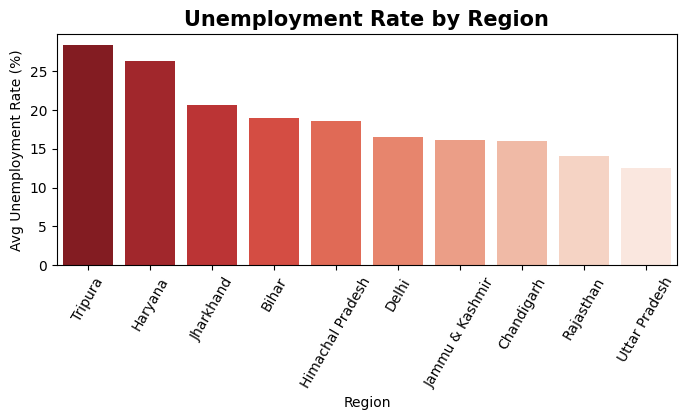

In [251]:
# Group by Region and calculate mean unemployment rate
by_region = unemployment_df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().reset_index()
top_10_region = by_region.sort_values(by = "Estimated Unemployment Rate (%)" , ascending = False).head(10) 


# Graph
plt.figure(figsize = (8,3))
sns.barplot(x= "Region",y="Estimated Unemployment Rate (%)", 
          hue = "Region", data = top_10_region, palette="Reds_r")

plt.xticks(rotation=60, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Region")
plt.ylabel("Avg Unemployment Rate (%)")
plt.title("Unemployment Rate by Region", fontsize = 15, fontweight = "bold")
plt.show()


## Average Unemployment Rate by Month

In [252]:
# Extracting month and year from "date" column
unemployment_df["Month"] = unemployment_df["Date"].dt.month_name()
unemployment_df["Year"] = unemployment_df["Date"].dt.year.astype(int)

unemployment_df["Year"] = unemployment_df["Year"].sort_values(ascending = True)

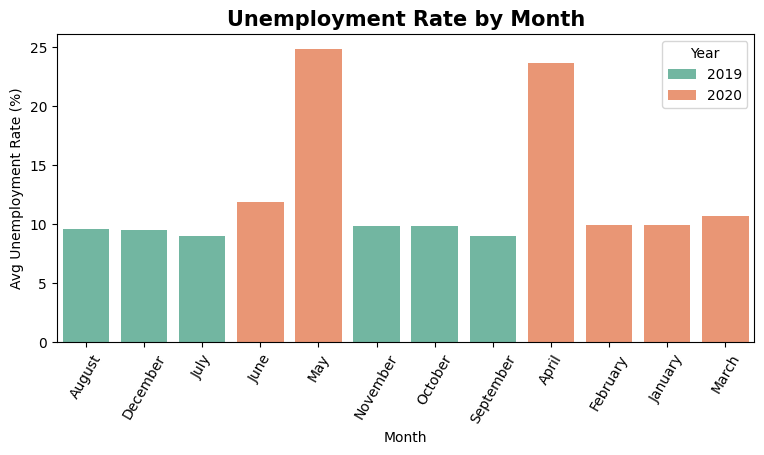

In [253]:
# Group by Region and calculate mean unemployment rate

by_month = unemployment_df.groupby(["Year", "Month"],observed=False)["Estimated Unemployment Rate (%)"].mean().reset_index()

# define month order
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# set month_name in correct order
unemployment_df["Month"] = pd.Categorical(unemployment_df["Month"], categories = month_order, ordered = True)

# sorting by year and month
by_month = by_month.sort_values("Year", ascending = True)

# Graph
plt.figure(figsize = (9,4))
sns.barplot(x= "Month",y="Estimated Unemployment Rate (%)", 
          hue = "Year", data = by_month, palette="Set2",dodge = False)

plt.xticks(rotation=60, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Month")
plt.ylabel("Avg Unemployment Rate (%)")
plt.title("Unemployment Rate by Month", fontsize = 15, fontweight = "bold")
plt.show()


## Average Unemployment Rate by Area (Rural vs Urban)

<function matplotlib.pyplot.show(close=None, block=None)>

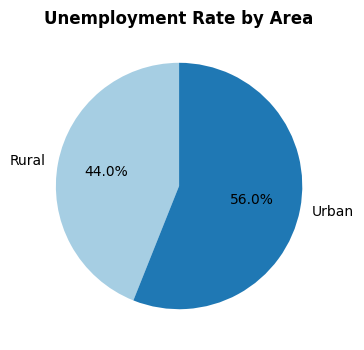

In [254]:
# Group by Area and calculate mean unemployment rate
by_area = unemployment_df.groupby("Area")["Estimated Unemployment Rate (%)"].mean().reset_index()

# visualization
labels = by_area["Area"]
sizes = by_area["Estimated Unemployment Rate (%)"]
plt.figure(figsize = (6, 4))
plt.pie(sizes, labels = labels, autopct = "%1.1f%%",startangle = 90, colors = sns.color_palette("Paired", len(sizes)))
plt.title("Unemployment Rate by Area", fontweight = "bold")
plt.show

## Estimated Labour Participation vs Unemployment Rate

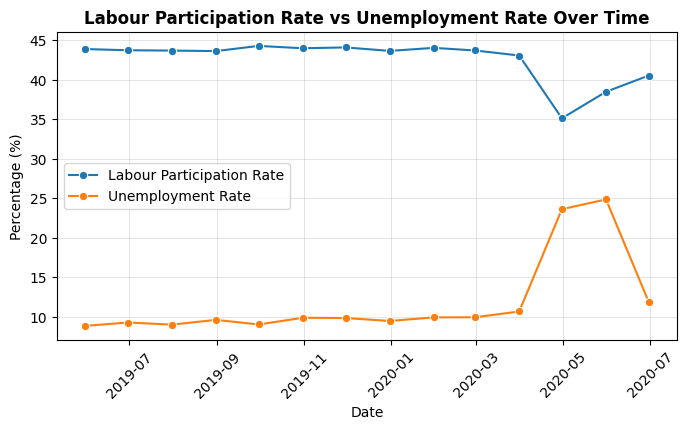

In [255]:
# Sort data by date 
unemployment_df = unemployment_df.sort_values(by="Date")

# Plot line chart
plt.figure(figsize=(8, 4))
sns.lineplot(x="Date", y="Estimated Labour Participation Rate (%)",
             data=unemployment_df,
             label="Labour Participation Rate",
             marker="o",
             errorbar=None)
sns.lineplot(x="Date", y="Estimated Unemployment Rate (%)",
             data=unemployment_df,
             label="Unemployment Rate",
             marker="o",
             errorbar=None)

# Formatting
plt.xlabel("Date")
plt.ylabel("Percentage (%)")
plt.title("Labour Participation Rate vs Unemployment Rate Over Time", fontweight="bold")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True, linewidth=0.5, alpha=0.5)
plt.show()


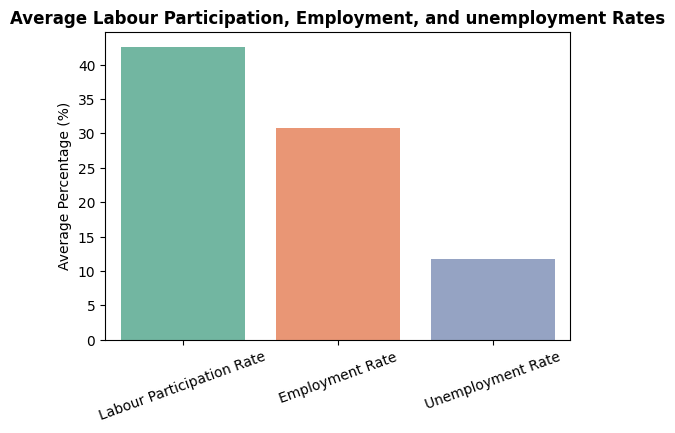

In [256]:
# Calculate averages
avg_labour_participation = unemployment_df["Estimated Labour Participation Rate (%)"].mean()
avg_unemployment = unemployment_df["Estimated Unemployment Rate (%)"].mean()
avg_employment = avg_labour_participation - avg_unemployment 

# Create DataFrame for plotting
avg_data = {
    "Category": ["Labour Participation Rate", "Employment Rate", "Unemployment Rate"],
    "Average (%)": [avg_labour_participation, avg_employment, avg_unemployment]
}

avg_df = pd.DataFrame(avg_data)

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x="Category", y="Average (%)", hue="Category", data=avg_df, palette="Set2")

plt.xlabel("")
plt.ylabel("Average Percentage (%)")
plt.title("Average Labour Participation, Employment, and unemployment Rates", fontweight="bold")
plt.xticks(rotation=20)  
plt.show()
